Número de observaciones (filas) = 768
Total de variables disponibles (columnas) = 9 
Columnas que cuentan con un valor nulo -
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


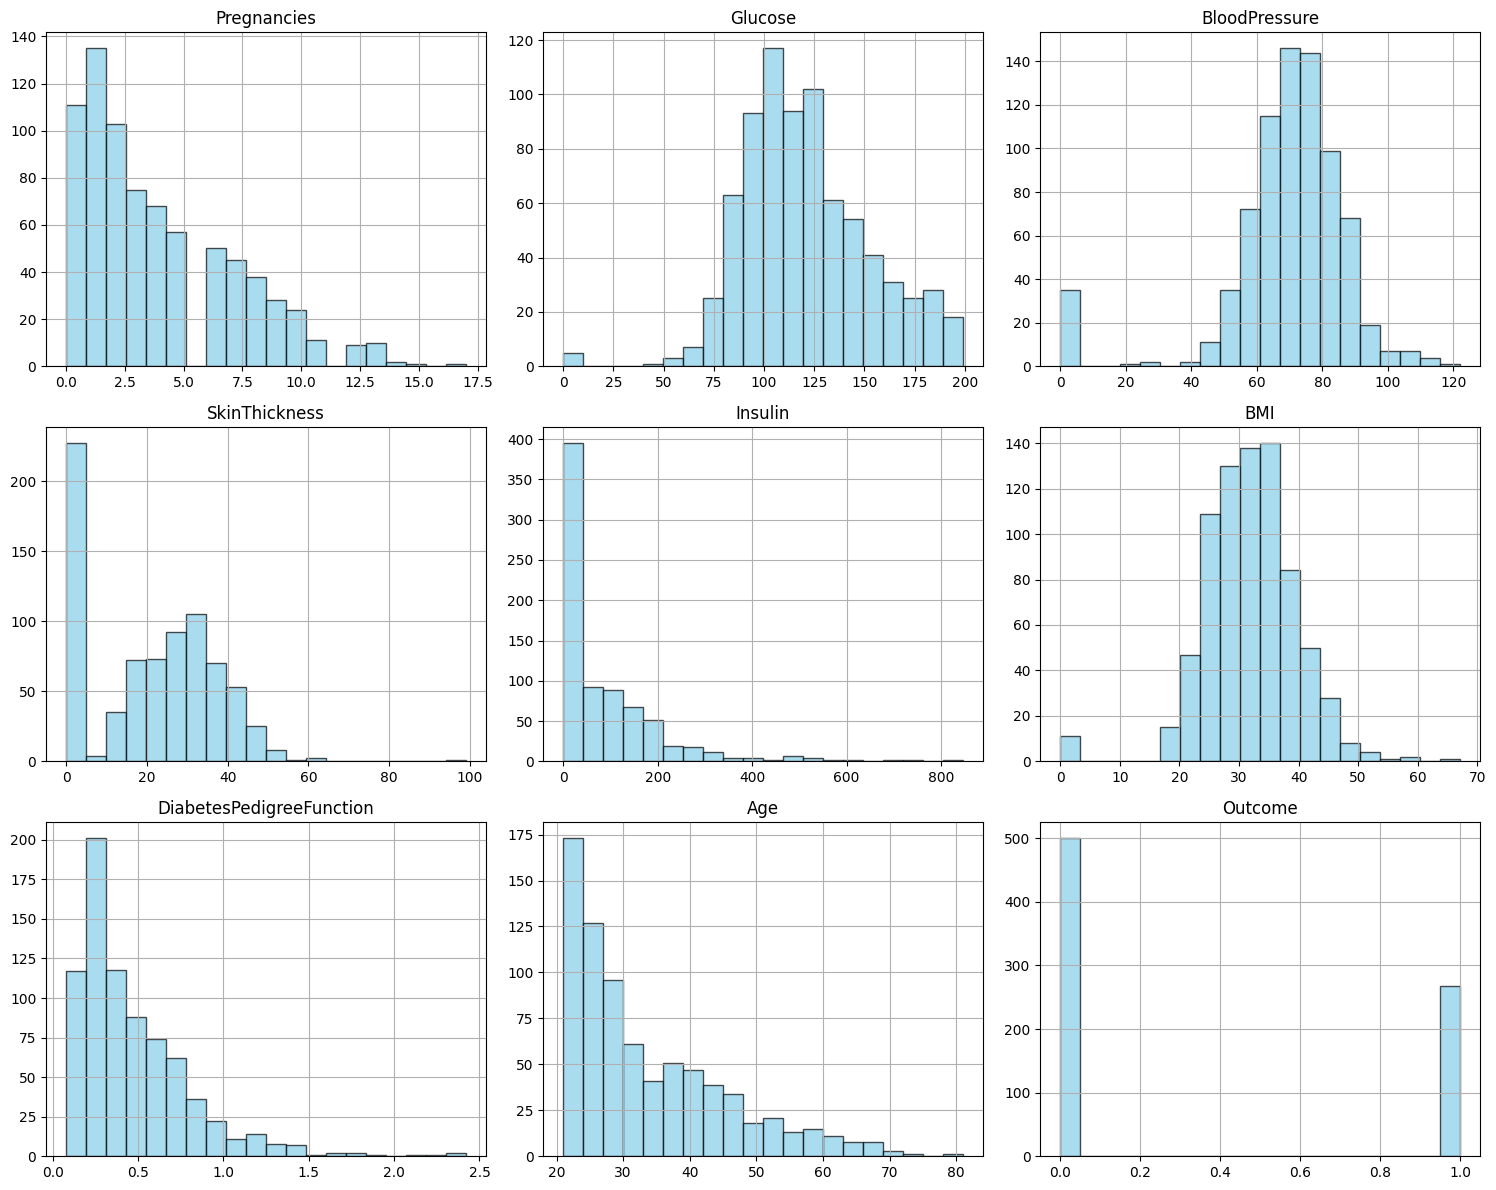

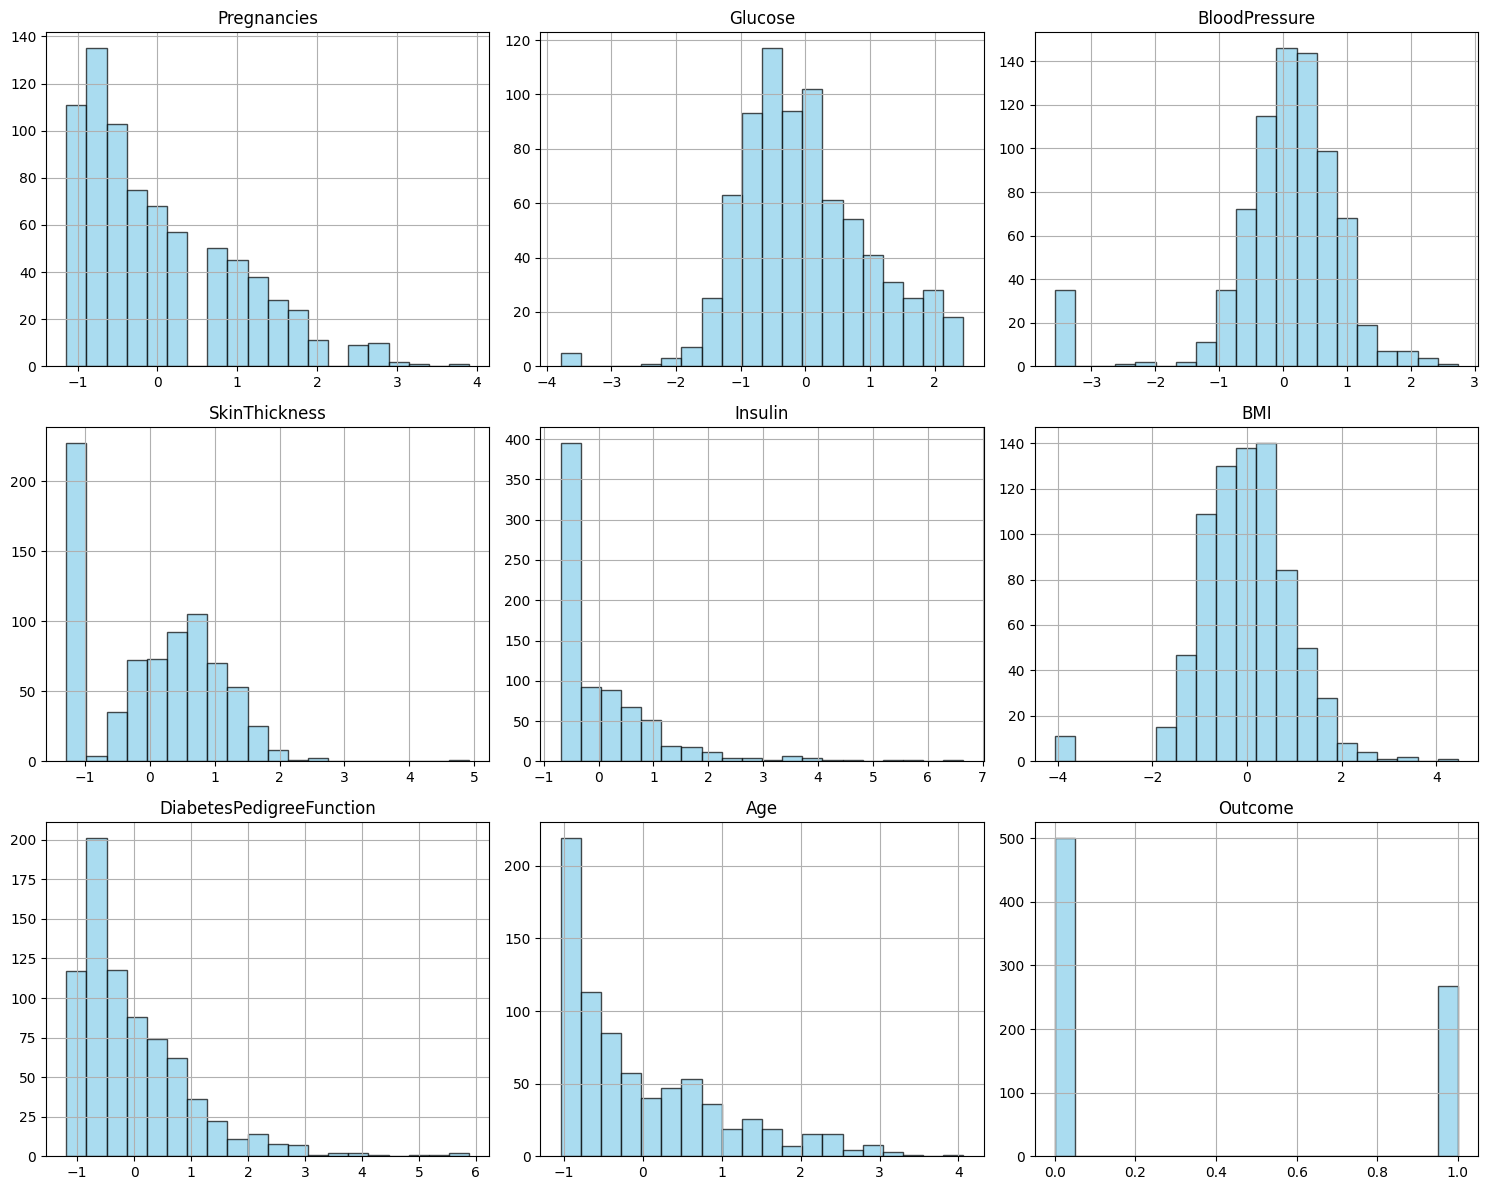

Recuento de clases en y_train:
Outcome
0    401
1    213
Name: count, dtype: int64
Modelo entrenado sin pesos


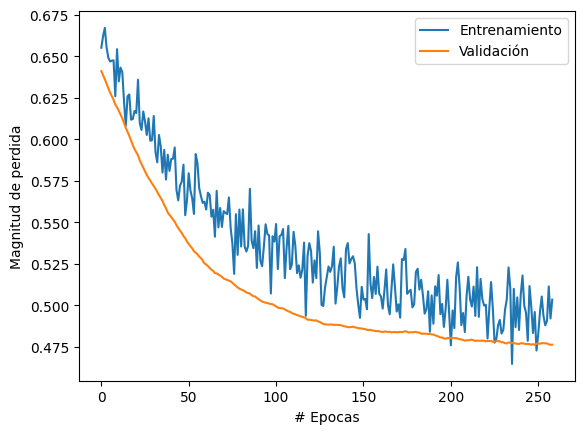

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
El resultado es: 0.020970148965716362
El resultado binario es: 0
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Precisión: 77.60%
Margen de error: 22.40%
Pesos de clase: {0: 0.7655860349127181, 1: 1.4413145539906103}


KeyError: 1

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Cargar el dataset
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 26/diabetes.csv')
df2 = df.copy()

# Información básica del dataset
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

# Crear histogramas de las características
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
for i, ax in enumerate(axes.flat):
    ax.set_title(df2.columns[i])
plt.tight_layout()
plt.show()

# Definir características numéricas y escalarlas
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

# Crear histogramas de las características escaladas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
for i, ax in enumerate(axes.flat):
    ax.set_title(df2.columns[i])
plt.tight_layout()
plt.show()

# Definir X e y
X = df2.drop(columns=['Outcome'])
y = df2['Outcome']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la presencia de ambas clases en y_train
class_counts = y_train.value_counts()
print("Recuento de clases en y_train:")
print(class_counts)

# Definir el modelo
def create_model(learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X.shape[1]]),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=8, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo sin pesos
model = create_model(learning_rate=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

historial = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])
print('Modelo entrenado sin pesos')

# Graficar la pérdida durante el entrenamiento
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

# Realizar una predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10, 10, 50]])
nuevo_dato = scaler.transform(nuevo_dato)
resultado = model.predict(nuevo_dato)
print(f'El resultado es: {resultado[0][0]}')

# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)
print(f'El resultado binario es: {prediccion_binaria[0][0]}')

# Realizar predicciones usando el modelo entrenado
predicciones = model.predict(X)
predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

# Agregar las predicciones al DataFrame
df2['Outcome_pred'] = predicciones_binarias

# Calcular la precisión del modelo
correct_prediction = (df2['Outcome'] == df2['Outcome_pred']).sum()
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')
margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

# Calcular y entrenar el modelo con pesos solo si ambas clases están presentes
if 0 in class_counts and 1 in class_counts:
    total_samples = len(y_train)
    weights = {
        0: total_samples / (2 * class_counts[0]),
        1: total_samples / (2 * class_counts[1])
    }
    print("Pesos de clase:", weights)

    # Crear y entrenar el modelo con pesos
    model = create_model(learning_rate=0.0001)

    historial = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping], class_weight=weights)
    print('Modelo entrenado con pesos de clase')

    # Graficar la pérdida durante el entrenamiento
    plt.xlabel('# Epocas')
    plt.ylabel('Magnitud de perdida')
    plt.plot(historial.history['loss'])
    plt.plot(historial.history['val_loss'])
    plt.legend(['Entrenamiento', 'Validación'])
    plt.show()

    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(X)
    predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

    # Agregar las predicciones al DataFrame
    df2['Outcome_pred_weighted'] = predicciones_binarias

    # Calcular la precisión del modelo
    correct_prediction_weighted = (df2['Outcome'] == df2['Outcome_pred_weighted']).sum()
    precisión_weighted = (correct_prediction_weighted / total_predicciones) * 100
    print(f'Precisión con pesos: {precisión_weighted:.2f}%')
    margen_de_error_weighted = 100 - precisión_weighted
    print(f'Margen de error con pesos: {margen_de_error_weighted:.2f}%')
else:
    print("Una de las clases no está presente en el conjunto de entrenamiento. No se pueden calcular los pesos.")


In [23]:
# Calcular los pesos de cada clase
class_counts = y_train.value_counts()

# Verificar que ambas clases estén presentes en y_train
if 0 in class_counts.index and 1 in class_counts.index:
    total_samples = len(y_train)
    weights = {
        0: total_samples / (2 * class_counts[0]),
        1: total_samples / (2 * class_counts[1])
    }
    print("Pesos de clase:", weights)

    # Crear y entrenar el modelo con pesos
    model = create_model(learning_rate=0.0001)

    historial = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping], class_weight=weights)
    print('Modelo entrenado con pesos de clase')

    # Graficar la pérdida durante el entrenamiento
    plt.xlabel('# Epocas')
    plt.ylabel('Magnitud de perdida')
    plt.plot(historial.history['loss'])
    plt.plot(historial.history['val_loss'])
    plt.legend(['Entrenamiento', 'Validación'])
    plt.show()

    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(X)
    predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

    # Agregar las predicciones al DataFrame
    df2['Outcome_pred_weighted'] = predicciones_binarias

    # Calcular la precisión del modelo
    correct_prediction_weighted = (df2['Outcome'] == df2['Outcome_pred_weighted']).sum()
    precisión_weighted = (correct_prediction_weighted / total_predicciones) * 100
    print(f'Precisión con pesos: {precisión_weighted:.2f}%')
    margen_de_error_weighted = 100 - precisión_weighted
    print(f'Margen de error con pesos: {margen_de_error_weighted:.2f}%')
else:
    print("Una de las clases no está presente en el conjunto de entrenamiento. No se pueden calcular los pesos.")


Pesos de clase: {0: 0.7655860349127181, 1: 1.4413145539906103}


KeyError: 1